Alumno: Erick Salavdor Alvarez Valencia

En esta tarea se hará la descomposición de una señal en su fase y su amplitud, para ello requeriremos calcular los coeficientes mediante la transformada rápida de Fourier para posteriormente hacer la reconstrucción de la misma con solamente los coeficientes que hemos calculado.

Primero creamos la imagen de la señal usando la función $g(m, n) = cos(A (m^2 + n^2) \frac{2 \pi k_0 n}{N})$ con $N = 512$, $k_0 = 64$ y $A = 0.001$.

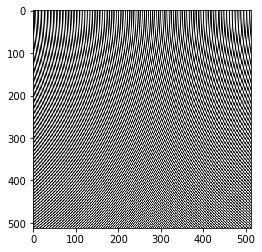

In [1]:
from math import *
import numpy as np
from numpy import linalg as LA
import skimage
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.color import rgb2grey

N = 512

def generate_signal():
    A = 0.001
    k0 = 64.0
    g = np.zeros((N, N), dtype = 'float')
    for m in range(N):
        for n in range(N):
            g[m, n] = np.cos(A * (float(m ** 2 + n ** 2)) + (2.0 * np.pi * k0 * float(n)) / float(N))
    
    return g
        
%matplotlib inline
g = generate_signal()
plt.imshow(g, cmap = "gray")

Ahora calculamos los coeficientes de Fourier usando la transformada rápida de Fourier.

In [2]:
Cmn = np.fft.fft2(g)
print(Cmn)

[[-32.18334914 +0.j         -32.19013047 +0.33060274j
  -32.21049252 +0.66177679j ..., -32.24448965 -0.99409643j
  -32.21049252 -0.66177679j -32.19013047 -0.33060274j]
 [-30.68765877+10.7991608j  -30.71962465+11.15123731j
  -30.76471417+11.50776906j ..., -30.67054116 +9.76373087j
  -30.66307841+10.1059908j  -30.66880297+10.45094106j]
 [-25.95871186+21.28519993j -25.99491690+21.69467126j
  -26.04274936+22.11250802j ..., -25.92020797+20.10045207j
  -25.92129241+20.48872215j -25.93415379+20.88343065j]
 ..., 
 [-17.40796142-30.66764245j -17.41831698-30.18731342j
  -17.43770179-29.71761816j ..., -17.42988592-32.17975964j
  -17.41384286-31.66309905j -17.40650588-31.15932149j]
 [-25.95871186-21.28519993j -25.93415379-20.88343065j
  -25.92129241-20.48872215j ..., -26.10221964-22.53939915j
  -26.04274936-22.11250802j -25.99491690-21.69467126j]
 [-30.68765877-10.7991608j  -30.66880297-10.45094106j
  -30.66307841-10.1059908j  ..., -30.82297566-11.86936875j
  -30.76471417-11.50776906j -30.71962465

Ahora hacemos una centralización de los datos usando la función $\textit{fftshift}$.

In [3]:
Cs = np.fft.fftshift(Cmn)

Calculamos la amplitud y la fase de la señal usando las fórmulas: $A_{m, n} = \sqrt(real(C_{m, n})^2 + imag(C_{m, n})^2)$ y $P = tan^{-1} (\frac{imag(C_{m, n})}{real(C_{m, n})})$.

In [4]:
def Amplitude_Phase(Cs):
    Phase = np.zeros(Cs.shape, dtype = 'float')
    Amplitude = np.zeros(Cs.shape, dtype = 'float')
    
    Amplitude = np.sqrt(Cs.real ** 2 + Cs.imag ** 2)
    Phase = np.arctan2(Cs.imag, Cs.real)
    
    return Amplitude, Phase

A, P = Amplitude_Phase(Cs)

Graficamos la Amplitud y la fase obtenidas.

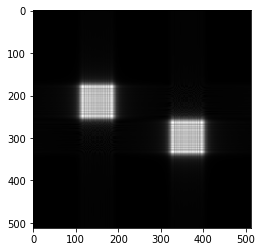

In [5]:
plt.imshow(A, cmap = "gray")

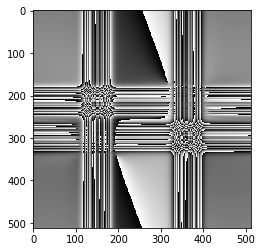

In [6]:
plt.imshow(P, cmap = "gray")

Finalmente realizamos la reconstrucción de la señal original usando la transformada inversa de Fourier. Pero antes tenemos que generar la señal definida como: $f = A cos(P) + A i sin(P)$.

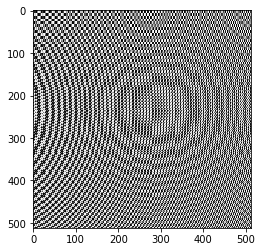

In [7]:
Org = np.zeros((N, N), dtype = 'complex')
Org = A * (np.cos(P) + 1j * np.sin(P))

Rec = np.fft.ifft2(Org)
        
plt.imshow(Rec.real, cmap = "gray")

Ahora vamos a repetir lo anterior pero sin centralizar los datos de la señal con $\textit{fftshift}$.

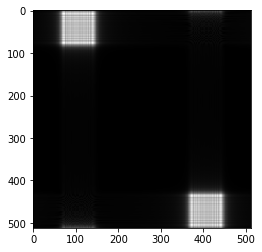

In [8]:
g = generate_signal()
Cmn = np.fft.fft2(g)
A, P = Amplitude_Phase(Cmn)
plt.imshow(A, cmap = "gray")

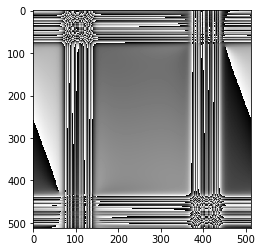

In [9]:
plt.imshow(P, cmap = "gray")

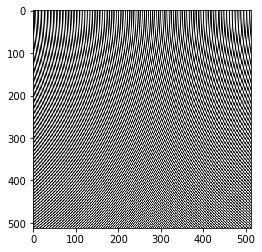

In [10]:
Org = np.zeros((N, N), dtype = 'complex')
Org = A * (np.cos(P) + 1j * np.sin(P))

Rec = np.fft.ifft2(Org)
        
plt.imshow(Rec.real, cmap = "gray")

Terminamos reconstruyendo la señal original.